# TRABALHO DE PCA ___ Import

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Get your dataset

In [148]:
credit= pd.read_csv('/Users/josuebezerra/Documents/Ironhack_works/Week-08/Unsupervised projec/credit_scoring_sample.csv')

In [149]:
credit.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0,64,0,0.249908,0,0,8158.0,0.0
1,0,58,0,3870.000000,0,0,NaN,0.0
2,0,41,0,0.456127,0,0,6666.0,0.0
3,0,43,0,0.000190,0,0,10500.0,2.0
4,1,49,0,0.271820,0,0,400.0,0.0


# Obtain a clean dataset (drop strings and missings for now)

 - you'll obtain a dataset you'll usually call something like: X_unscaled 

In [150]:
'''
decidimos apenas completar os valores dos monthly incomes como '0' para os não informados
'''
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45063 entries, 0 to 45062
Data columns (total 8 columns):
SeriousDlqin2yrs                        45063 non-null int64
age                                     45063 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    45063 non-null int64
DebtRatio                               45063 non-null float64
NumberOfTimes90DaysLate                 45063 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    45063 non-null int64
MonthlyIncome                           36420 non-null float64
NumberOfDependents                      43946 non-null float64
dtypes: float64(3), int64(5)
memory usage: 2.8 MB


In [151]:
credit.fillna('0',inplace=True)

In [152]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45063 entries, 0 to 45062
Data columns (total 8 columns):
SeriousDlqin2yrs                        45063 non-null int64
age                                     45063 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    45063 non-null int64
DebtRatio                               45063 non-null float64
NumberOfTimes90DaysLate                 45063 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    45063 non-null int64
MonthlyIncome                           45063 non-null object
NumberOfDependents                      45063 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 2.8+ MB


In [153]:
credit=credit.astype(float)

In [154]:
credit.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,45063.0,0.222489,0.415922,0.0,0.000000,0.000000,0.000000,1.0
age,45063.0,51.210949,14.651533,21.0,40.000000,51.000000,62.000000,107.0
NumberOfTime30-59DaysPastDueNotWorse,45063.0,0.750993,6.184521,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,45063.0,352.062688,2467.556358,0.0,0.176373,0.373949,0.857027,326442.0
NumberOfTimes90DaysLate,45063.0,0.570712,6.173106,0.0,0.000000,0.000000,0.000000,98.0
NumberOfTime60-89DaysPastDueNotWorse,45063.0,0.505870,6.153609,0.0,0.000000,0.000000,0.000000,98.0
MonthlyIncome,45063.0,5214.731221,11642.229782,0.0,1636.000000,4200.000000,7121.500000,1794060.0
NumberOfDependents,45063.0,0.770055,1.123438,0.0,0.000000,0.000000,1.000000,10.0


# For every problem you need to compare values, those values HAVE to be comparable.

 - So you need to standardize your data. Store your results into an X variable

In [155]:
credit.head()

,SeriousDlqin2yrs,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,MonthlyIncome,NumberOfDependents
0,0.0,64.0,0.0,0.249908,0.0,0.0,8158.0,0.0
1,0.0,58.0,0.0,3870.000000,0.0,0.0,0.0,0.0
2,0.0,41.0,0.0,0.456127,0.0,0.0,6666.0,0.0
3,0.0,43.0,0.0,0.000190,0.0,0.0,10500.0,2.0
4,1.0,49.0,0.0,0.271820,0.0,0.0,400.0,0.0


In [156]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(credit)
credit_std = scaler.transform(credit)

In [157]:
credit_std

array([[-0.53493424,  0.87289113, -0.12143243, ..., -0.08220789,
         0.25281252, -0.68545299],
       [-0.53493424,  0.46337311, -0.12143243, ..., -0.08220789,
        -0.44792013, -0.68545299],
       [-0.53493424, -0.69692794, -0.12143243, ..., -0.08220789,
         0.12465695, -0.68545299],
       ...,
       [ 1.86938867, -0.90168695, -0.12143243, ..., -0.08220789,
        -0.19023467,  1.09481664],
       [-0.53493424, -0.28740992,  0.04026338, ..., -0.08220789,
         0.55877105,  3.76522109],
       [ 1.86938867, -0.42391593,  0.20195918, ..., -0.08220789,
         0.33544366,  1.09481664]])

# Visualize your clusters.

 - If your dataset has more than 2 columns (the usual case), you'll have to apply a PCA technique to decrease the number of features from N to 2.


In [187]:
kmeans = KMeans(n_clusters=3) 

In [188]:
kmeans.fit(credit_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [189]:
y_kmeans = kmeans.predict(credit_std)
y_kmeans

array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

In [190]:
kmeans.cluster_centers_

array([[ 1.86938867e+00, -3.51828486e-01,  3.48620609e-02,
        -2.13499990e-02,  1.52817722e-02, -1.75599754e-02,
        -4.05337712e-02,  1.50799788e-01],
       [-5.34934236e-01,  1.04605175e-01, -8.97500993e-02,
         6.73517970e-03, -8.45206378e-02, -7.55601268e-02,
         1.31371241e-02, -4.05972851e-02],
       [ 1.45065828e+00, -1.04547839e+00,  1.57156723e+01,
        -1.39635169e-01,  1.57739372e+01,  1.58344539e+01,
        -3.33960909e-01, -3.85407550e-01]])

In [191]:
credit_std.shape

(45063, 8)

# Analise com target

In [192]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(credit_std)

pca.explained_variance_ratio_

array([0.37726771, 0.1646826 ])

In [193]:
Z=pca.transform(credit_std)

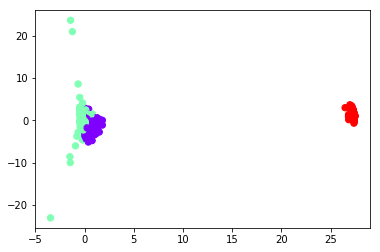

In [194]:
plt.scatter(Z[:, 0], Z[:, 1], s=40, c=kmeans.labels_, cmap='rainbow');

In [195]:
kmeans.labels_

array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

In [196]:
first_center = kmeans.cluster_centers_[0]

In [197]:
x_center1 = first_center[0]

In [198]:
y_center1 = first_center[1]

In [199]:
credit['cluster']=kmeans.labels_

In [200]:
credit.columns

Index(['SeriousDlqin2yrs', 'age', 'NumberOfTime30-59DaysPastDueNotWorse',
       'DebtRatio', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse', 'MonthlyIncome',
       'NumberOfDependents', 'cluster'],
      dtype='object')

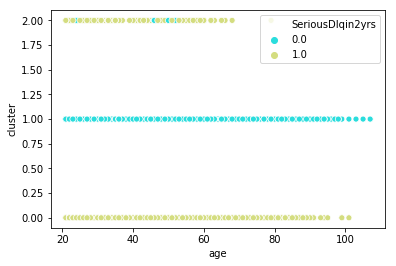

In [290]:
'''
Como colocamos o target no modelo, percebemos que ele separou o perfil os bons pagadores no cluster 1
'''
sns.scatterplot(credit['age'],credit['cluster'], hue=credit['SeriousDlqin2yrs'],palette='rainbow');

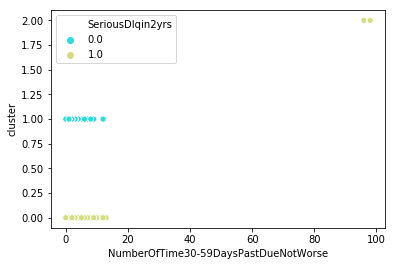

In [293]:
sns.scatterplot(credit['NumberOfTime30-59DaysPastDueNotWorse'],credit['cluster'], hue=credit['SeriousDlqin2yrs'],palette='rainbow');

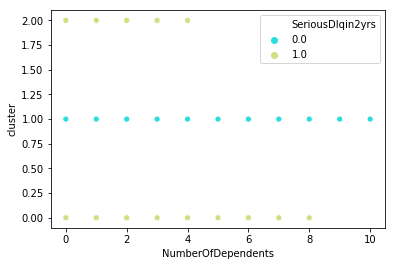

In [294]:
sns.scatterplot(credit['NumberOfDependents'],credit['cluster'], hue=credit['SeriousDlqin2yrs'], palette='rainbow');

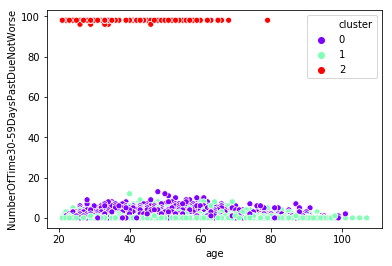

In [291]:
sns.scatterplot(credit['age'],credit['NumberOfTime30-59DaysPastDueNotWorse'], hue=credit['cluster'],palette='rainbow');

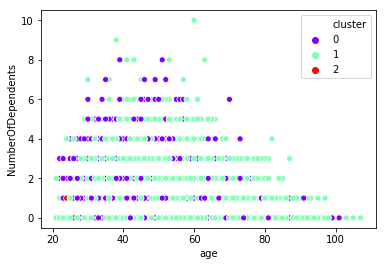

In [295]:
sns.scatterplot(credit['age'],credit['NumberOfDependents'], hue=credit['cluster'],palette='rainbow');

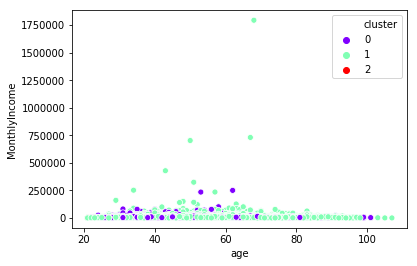

In [296]:
sns.scatterplot(credit['age'],credit['MonthlyIncome'], hue=credit['cluster'],palette='rainbow')

In [220]:
credit.groupby('cluster').mean().T

cluster,0,1,2
SeriousDlqin2yrs,1.000000,0.000000,0.825843
age,46.056180,52.743558,35.893258
NumberOfTime30-59DaysPastDueNotWorse,0.966596,0.195938,97.943820
DebtRatio,299.380947,368.681939,7.508862
NumberOfTimes90DaysLate,0.665047,0.048963,97.943820
NumberOfTime60-89DaysPastDueNotWorse,0.397814,0.040907,97.943820
MonthlyIncome,4742.832979,5367.674941,1326.724719
NumberOfDependents,0.939468,0.724447,0.337079


# Analise sem o target

In [262]:
credit.columns

Index(['SeriousDlqin2yrs', 'age', 'NumberOfTime30-59DaysPastDueNotWorse',
       'DebtRatio', 'NumberOfTimes90DaysLate',
       'NumberOfTime60-89DaysPastDueNotWorse', 'MonthlyIncome',
       'NumberOfDependents', 'cluster'],
      dtype='object')

In [263]:
credit2 = credit2[credit2.MonthlyIncome>0]

In [264]:
creditx=credit.drop(['cluster'], axis=1)

In [265]:
credit2=credit.drop(['SeriousDlqin2yrs','cluster'], axis=1)

In [267]:
scaler = StandardScaler().fit(credit2)
credit_std2 = scaler.transform(credit2)

In [268]:
kmeans2 = KMeans(n_clusters=3) 

kmeans2.fit(credit_std2)

y_kmeans2 = kmeans2.predict(credit_std2)
y_kmeans2

kmeans2.cluster_centers_

array([[-0.73652409, -0.05156378, -0.06086027, -0.0526765 , -0.05743251,
         0.04736282,  0.52222196],
       [ 0.75769942, -0.07327035,  0.06303601, -0.07260441, -0.06824983,
        -0.04551484, -0.52822211],
       [-1.04547839, 15.71567234, -0.13963517, 15.77393718, 15.8344539 ,
        -0.33396091, -0.38540755]])

In [269]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(credit_std2)

pca2.explained_variance_ratio_

array([0.42717997, 0.17668242])

In [270]:
W=pca2.transform(credit_std2)

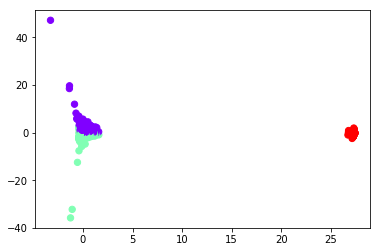

In [271]:
plt.scatter(W[:, 0], W[:, 1], s=40, c=kmeans2.labels_, cmap='rainbow');

In [275]:
creditx['cluster']=kmeans2.labels_
creditx.groupby('cluster').mean().T

cluster,0,1,2
SeriousDlqin2yrs,0.281868,0.157356,0.825843
age,40.416191,62.297332,35.893258
NumberOfTime30-59DaysPastDueNotWorse,0.432020,0.298051,97.943820
DebtRatio,201.583255,507.654745,7.508862
NumberOfTimes90DaysLate,0.245479,0.122687,97.943820
NumberOfTime60-89DaysPastDueNotWorse,0.152540,0.085863,97.943820
MonthlyIncome,5766.343768,4685.552317,1326.724719
NumberOfDependents,1.357828,0.176531,0.337079


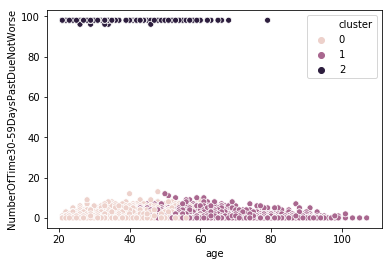

In [276]:
sns.scatterplot(creditx['age'],creditx['NumberOfTime30-59DaysPastDueNotWorse'], hue=creditx['cluster'],palette='rainbow');

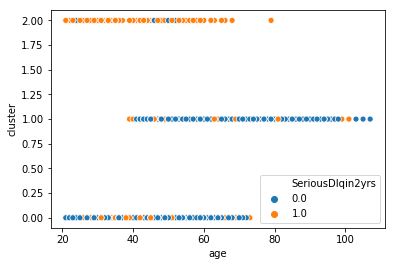

In [280]:
sns.scatterplot(creditx['age'],creditx['cluster'], hue=creditx['SeriousDlqin2yrs'],palette='rainbow);

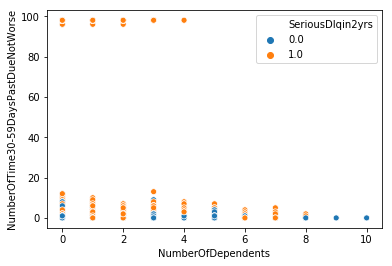

In [281]:
sns.scatterplot(creditx['NumberOfDependents'],creditx['NumberOfTime30-59DaysPastDueNotWorse'], hue=creditx['SeriousDlqin2yrs'],palette='rainbow);

(0, 100000)

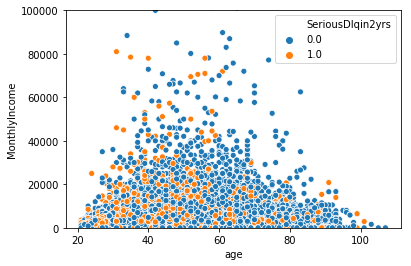

In [285]:
sns.scatterplot(creditx['age'],creditx['MonthlyIncome'], hue=creditx['SeriousDlqin2yrs'],palette='rainbow)
plt.ylim(0,100000)